<a href="https://colab.research.google.com/github/jduell12/DS-Unit-1-Sprint-2-Statistics/blob/master/C_Sprint_2_Fix_My_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Can you fix my code?

I tried to complete yesterday's activity but I have so many errors!  Can you find and fix them all?





### Dataset description:

Slasher movies thrill audiences by portraying a lone antagonist (typically male) who attacks innocent victims with extreme violence and without apparent motive. However, this exciting (if gory) subgenre of horror film is criticized by those who view the violence as being used to “punish” female characters who engage in sexual activity during the film. 

To test this claim, study authors randomly sampled 50 North American slasher films released from 1960 to 2009 and coded the 485 characters appearing in them as being male or female, involved in sexual activity or not, and if they survived the film or not. 

The data appears in the Slasher.csv dataset. In this project, we are going to answer a slightly simpler question: Are female characters in slasher films more likely to be "murdered" than male characters?

Source: A. Welsh (2010). "On the Perils of Living Dangerously in the Slasher Horror Film: Gender Differences in the Association Between Sexual Activity and Survival," Sex Roles, Vol. 62 pp. 762-773

You can find the Slasher.csv file here:

<https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv>





### 1) Load the Slasher.csv dataset in a new dataframe.



In [8]:
# Imports
import pandas as pd
import numpy as np

# Load the dataset
data_url = 'https://raw.githubusercontent.com/Chelsea-Myers/Lambda-Intro/master/Slasher.csv'

df = pd.read_csv(data_url, skipinitialspace=True, header=0)


###2) Display the top 5 rows of the dataframe to take a look at the variable names and values.

In [9]:
print(df.shape)
df.head()

(485, 4)


,ID,Gender,Activity,Survival
0,1,1,1,1
1,2,1,1,1
2,3,1,1,1
3,4,1,1,1
4,5,1,1,1


The variable codes are:

ID = Character ID

Gender = Character gender.  0 = female, 1 = male

Activity = Character was portrayed as engaged in sexual activity.  0 = no, 1 = yes

Survival = Character survival in the film. 0 = did not survive, 1 = survived

###3) Calculate the frequency and relative frequency of male and female characters in this set of slasher films.  Describe your results in a sentence or two.

In [11]:
Gender = pd.crosstab(index=df["Gender"], columns="counts")
print(Gender)

Gender = Gender/Gender.sum()*100
print(Gender)

col_0   counts
Gender        
0          263
1          222
col_0      counts
Gender           
0       54.226804
1       45.773196


###4) Calculate the frequency and relative frequency of character survival in this set of slasher films.  Describe your results in a sentence or two.

In [14]:
Survival = pd.crosstab(index=df["Survival"], columns='counts')
print(Survival)

Survival = Survival/Survival.sum()*100
print(Survival)

col_0     counts
Survival        
0            400
1             85
col_0        counts
Survival           
0         82.474227
1         17.525773


###5) Calculate the joint distribution of character sex and movie survival. Add the table margins.  

Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [16]:
pd.crosstab(df['Gender'],df['Survival'])

Survival,0,1
Gender,,
0,228,35
1,172,50


In [18]:
pd.crosstab(df['Gender'],df['Survival'],normalize=True)*100

Survival,0,1
Gender,,
0,47.010309,7.216495
1,35.463918,10.309278


###6) Calculate the distribution of survival conditional on character sex.
Hint: If you are working off of the in-class examples, it will be helpful to include character sex as the index variable. 

Describe your results in a sentence or two.

In [20]:
pd.crosstab(index=df['Gender'], columns=df['Survival'],normalize="index")*100

Survival,0,1
Gender,,
0,86.692015,13.307985
1,77.477477,22.522523


### 8) Perform the chi-square test above using `stats.chi2_contingency()` and output the p-value.


In [22]:
from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(index=df['Gender'], columns=df['Survival']))

print(p)

0.011104692591139975


### 10) Create a side-by-side bar plot to illustrate the relationship between character sex and survival in slasher movies.  Sum up your overall results in a sentence or two.

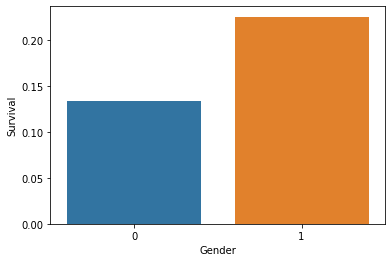

In [24]:
import seaborn as sns

sns.barplot(x="Gender", y="Survival", data=df, ci=None)